<a href="https://colab.research.google.com/github/ArohiniAshokan/Admission_pred/blob/main/Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [192]:
a=pd.read_csv('/content/Admission_Predict.csv')

In [193]:
#first 5 rows
a.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [194]:
#last 5 rows
a.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [195]:
#column names
a.columns
#GRE- graduate record examination
#TOEFL- Test of English as a Foreign Language
#SOP - Statement of Purpose
#LOR - Letter of recommendation

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [196]:
#total rows and columns
f'Rows = {a.shape[0]} and Columns = {a.shape[1]}'

'Rows = 400 and Columns = 9'

In [197]:
a.shape

(400, 9)

In [198]:
#overall information
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [199]:
a.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [200]:
#missing values checking
a.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [201]:
#dropping unnecessary columns
a.drop(['Serial No.'],axis=1,inplace=True)

In [202]:
a.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Identifying and removing outliers

In [203]:
#checking for non-numeric values in selected columns
non_numeric_values= a[['LOR ','SOP','Research','CGPA','University Rating']].apply(lambda x:pd.to_numeric(x,errors='coerce')).isnull().sum()

In [204]:
#non numeric values
non_numeric_values

LOR                  0
SOP                  0
Research             0
CGPA                 0
University Rating    0
dtype: int64

In [205]:
a['Chance of Admit '].value_counts()

0.64    17
0.71    16
0.72    15
0.73    13
0.94    12
0.79    12
0.76    12
0.70    12
0.78    12
0.74    11
0.80    11
0.68    10
0.93     9
0.84     9
0.89     9
0.65     9
0.62     9
0.82     8
0.86     8
0.75     8
0.90     8
0.57     8
0.81     8
0.77     8
0.91     7
0.69     7
0.96     7
0.66     7
0.61     7
0.67     7
0.85     6
0.63     6
0.56     6
0.92     6
0.58     5
0.46     5
0.87     5
0.54     5
0.52     5
0.47     5
0.59     4
0.49     4
0.97     4
0.88     4
0.95     4
0.53     3
0.48     3
0.44     3
0.42     3
0.83     3
0.38     2
0.34     2
0.36     2
0.45     2
0.50     2
0.43     1
0.51     1
0.55     1
0.60     1
0.39     1
Name: Chance of Admit , dtype: int64

<Axes: >

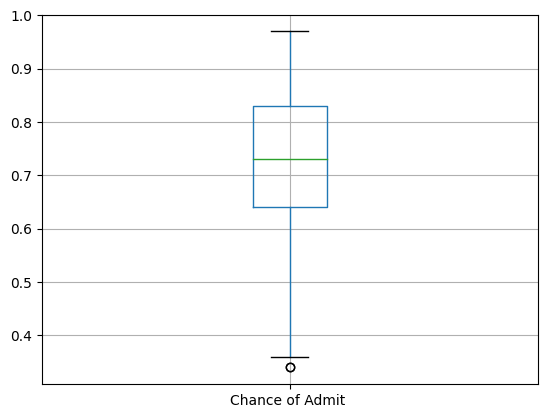

In [206]:
a.boxplot(column=['Chance of Admit '])

<Axes: >

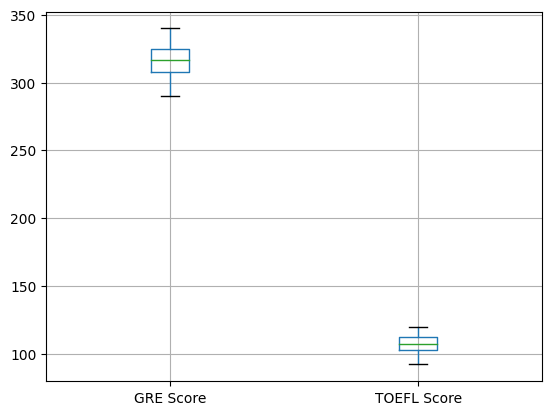

In [207]:
a.boxplot(column= ['GRE Score','TOEFL Score'])

<Axes: >

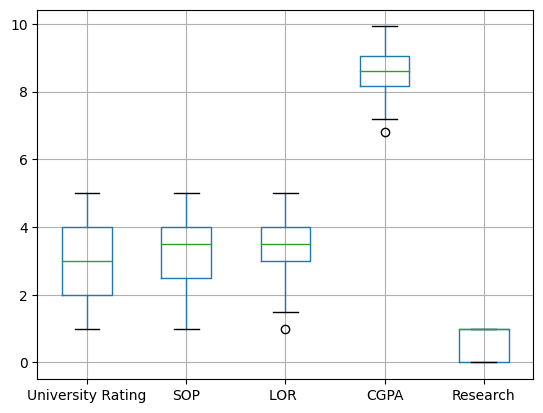

In [208]:
a.boxplot(column = ['University Rating', 'SOP','LOR ', 'CGPA', 'Research'])

Removing outliers using IQR method

In [209]:
a1=a.copy()
Q1=a1.quantile(0.25)
Q3=a1.quantile(0.75)
IQR=Q3-Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.8925
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [210]:
#identifying outliers
a1_out=a1[((a1<(Q1-1.5*IQR))|(a1>(Q3+1.5*IQR))).any(axis=1)]
a1_out.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.80,1,0.36
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


In [211]:
#removing outliers
a=a1[~((a1<(Q1-1.5*IQR))|(a1>(Q3+1.5*IQR))).any(axis=1)]
a.shape

(396, 8)

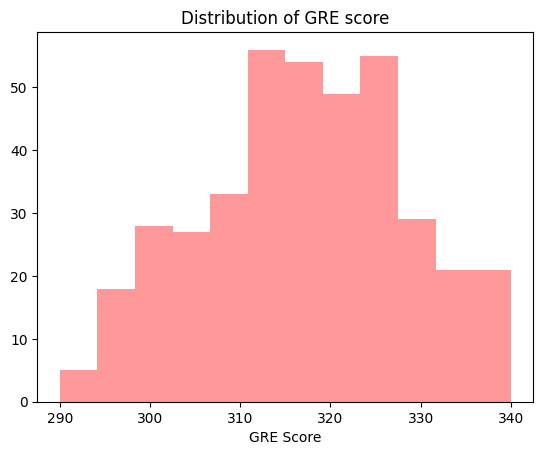

In [212]:
fig=sns.distplot(a['GRE Score'],kde=False,color='red')
plt.title('Distribution of GRE score')
plt.show()

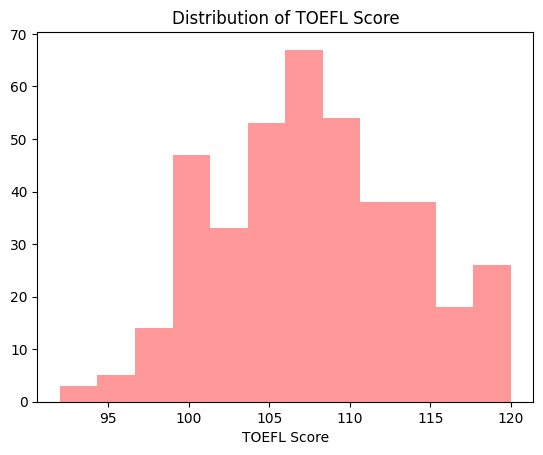

In [213]:
#TOEFL
fig=sns.distplot(a['TOEFL Score'],kde=False,color='red')
plt.title('Distribution of TOEFL Score')
plt.show()

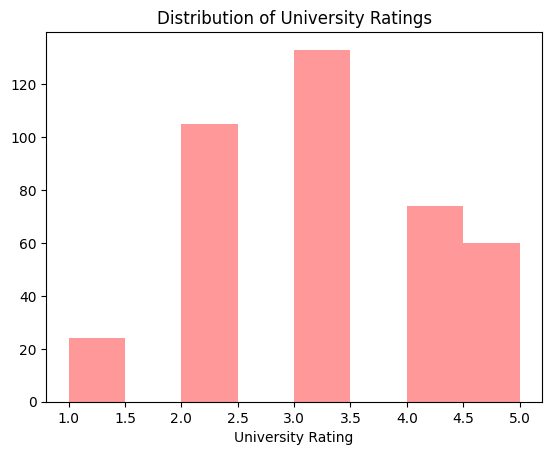

In [214]:
#University ratings
fig=sns.distplot(a['University Rating'],kde=False,color='red')
plt.title('Distribution of University Ratings')
plt.show()

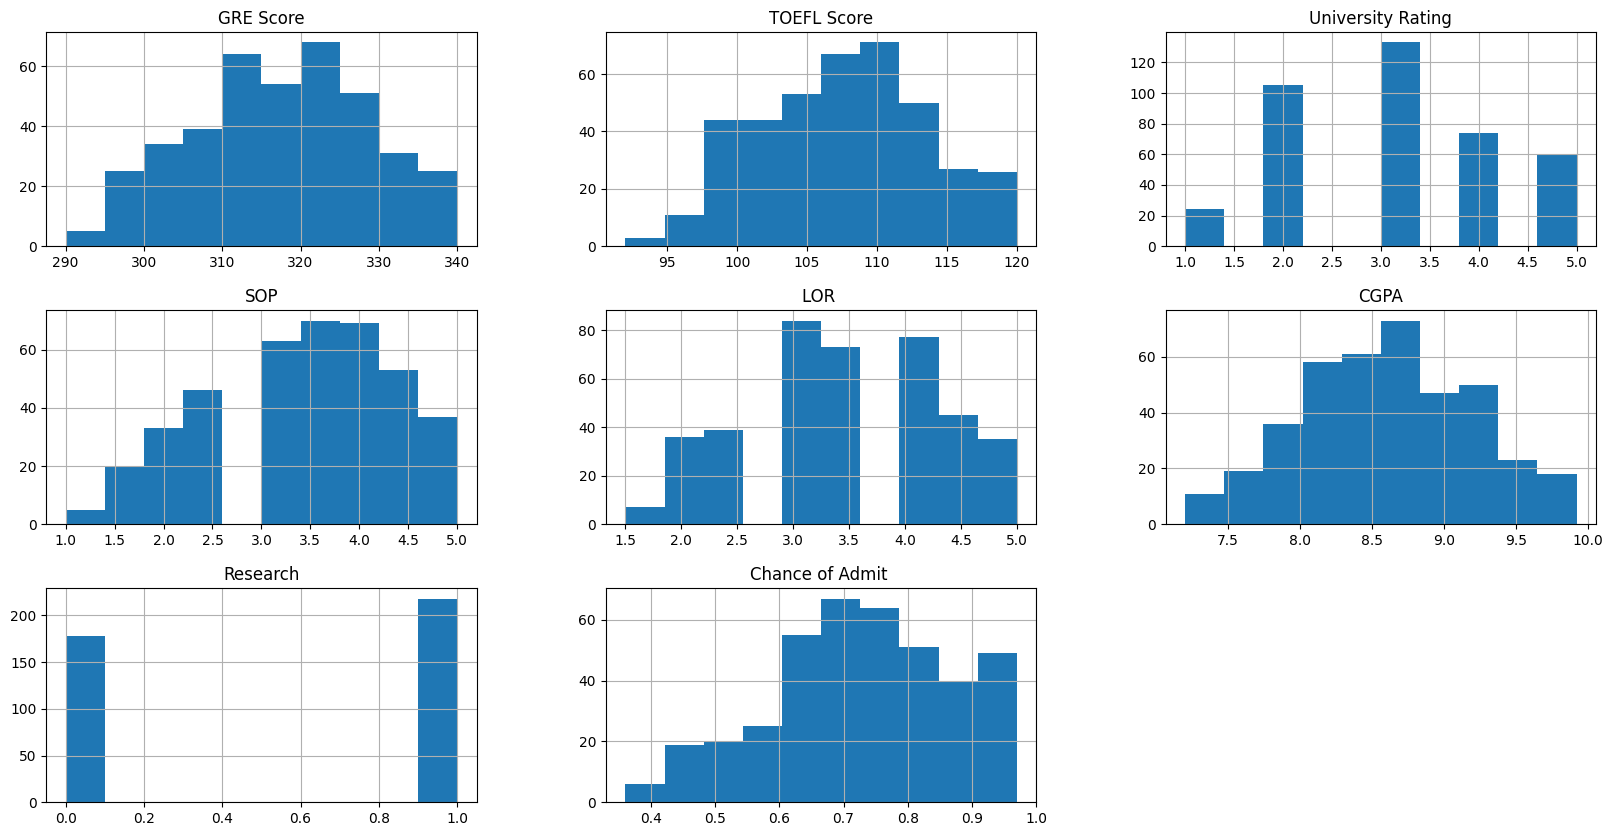

In [215]:
a.hist(figsize=(20,10))
plt.show()

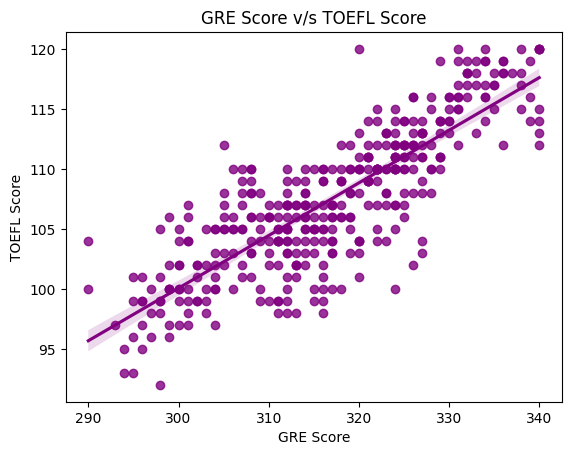

In [216]:
fig=sns.regplot(x=a['GRE Score'],y=a['TOEFL Score'],color='purple')
plt.title('GRE Score v/s TOEFL Score')
plt.show()

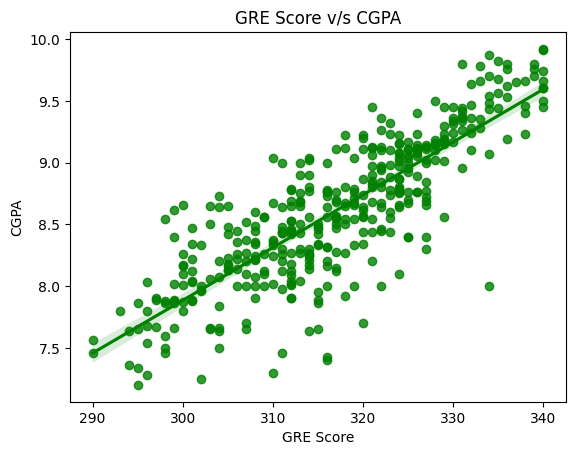

In [217]:
fig=sns.regplot(x=a['GRE Score'],y=a['CGPA'],color='green')
plt.title('GRE Score v/s CGPA')
plt.show()

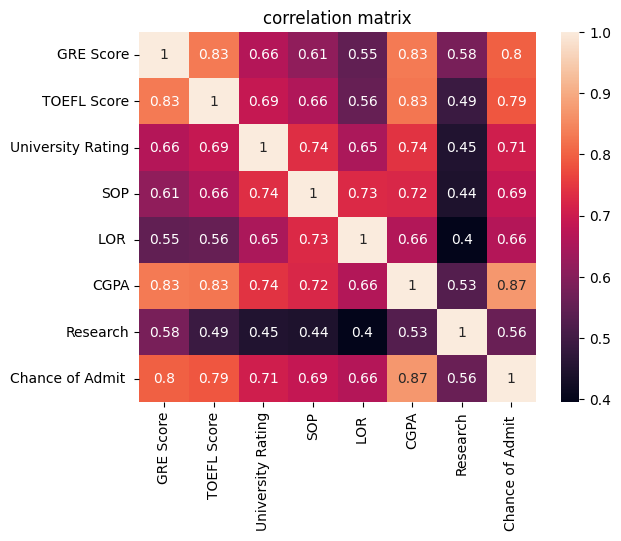

In [218]:
sns.heatmap(a.corr(),annot=True)
plt.title("correlation matrix")
plt.show()

Splitting x and y

In [219]:
x=a.drop('Chance of Admit ',axis=1)

In [220]:
y=a['Chance of Admit ']

In [221]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [222]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 396, dtype: float64

In [223]:
#if y>0.5 then chance of admit is higher so convert y>0.5 to int
#now it has become a classification model
y=(y>0.5).astype(int)
y.value_counts()

1    365
0     31
Name: Chance of Admit , dtype: int64

In [224]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [226]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [227]:
from sklearn.metrics import*
print('classification report :',classification_report(y_pred,y_test))
print('accuracy score : ',accuracy_score(y_pred,y_test))

classification report :               precision    recall  f1-score   support

           0       0.33      0.75      0.46         4
           1       0.99      0.92      0.95        76

    accuracy                           0.91        80
   macro avg       0.66      0.84      0.71        80
weighted avg       0.95      0.91      0.93        80

accuracy score :  0.9125


In [233]:
#new prediction
new_data=pd.DataFrame({'GRE Score':[320],'TOEFL Score':[110],'University Rating':[4],'SOP':[4.5],'LOR ':[4.5],'CGPA':[9.0],'Research':[1]})
chance_of_admit=model.predict(new_data)
print('chance_of_admit :',chance_of_admit)

chance_of_admit : [1]
